# Part B Data Preparation

## B1a Visualization for the distribution of the different classes


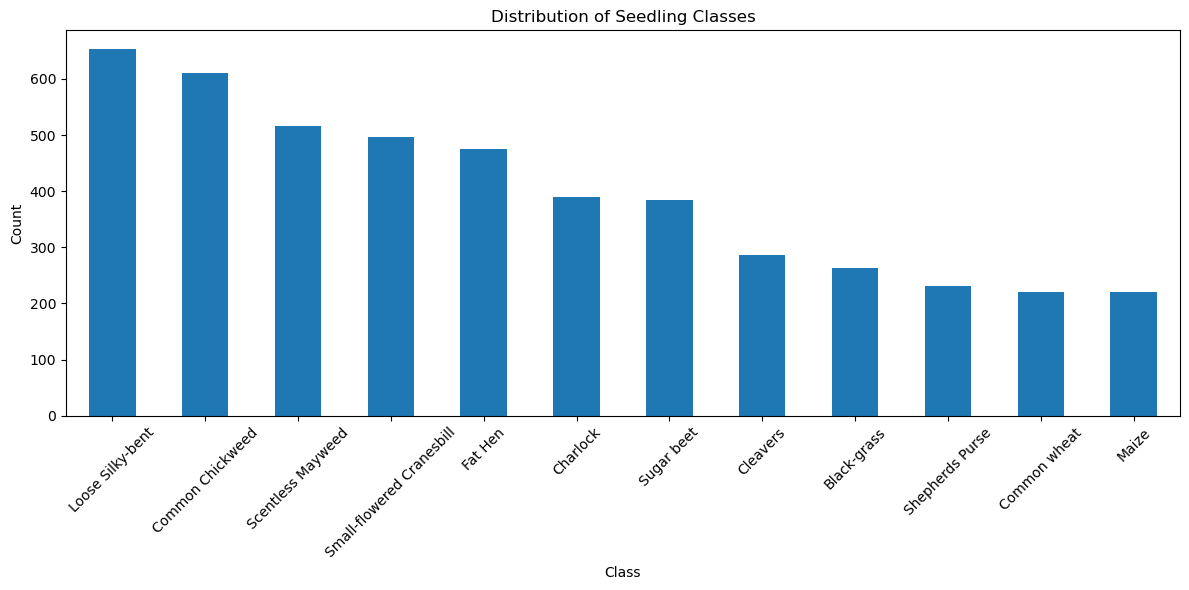

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

labels = pd.read_csv("labels.csv")
plt.figure(figsize=(12,6))
labels['Label'].value_counts().plot(kind='bar')
plt.title("Distribution of Seedling Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("class_distribution.png")
plt.show()

## B1b Display sample images with associated labels 

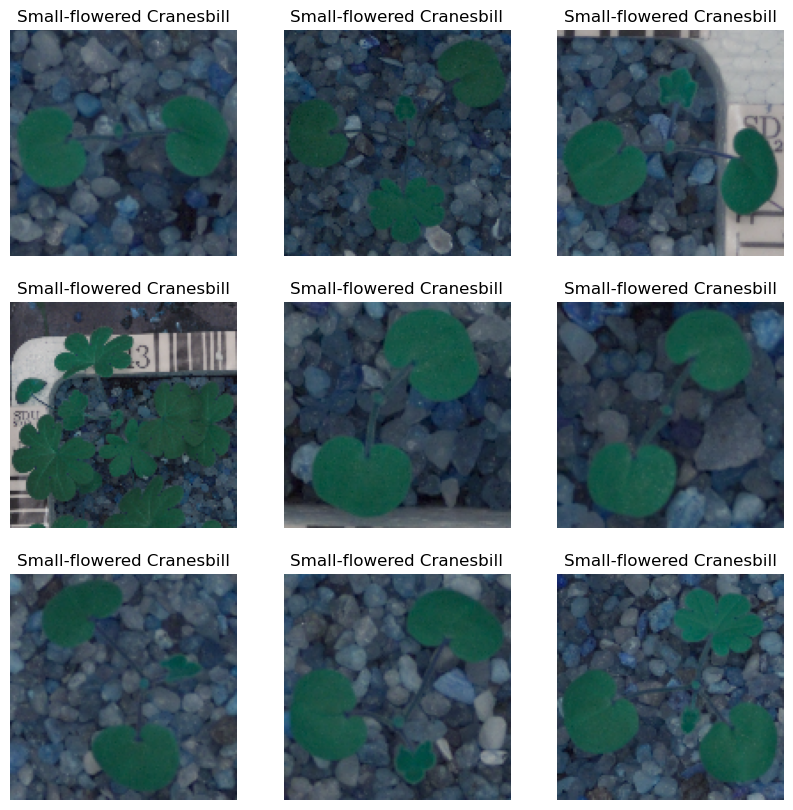

In [14]:
import numpy as np

images = np.load("images.npy")
labels = pd.read_csv("labels.csv")

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(labels['Label'][i])
    plt.axis('off')
plt.tight_layout
plt.savefig("sample_images_with_labels.png")
plt.show()

## B2 Data Augmentation

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

## B3 Image Normalization

In [26]:
images = images.astype('float32') / 255.0

## B4. Train-Validation-Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(images, labels['Label'], test_size=0.3, stratify=labels['Label'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

## B5 Encode the Target Feature

In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_train_enc = to_categorical(encoder.fit_transform(y_train))
y_val_enc = to_categorical(encoder.transform(y_val))
y_test_enc = to_categorical(encoder.transform(y_test))

## B6 Copy of All Datasets

In [45]:
np.save("X_train.npy", X_train)
np.save("X_val.npy", X_val)
np.save("X_test.npy", X_test)

np.save("y_train_enc.npy", y_train_enc)
np.save("y_val_enc.npy", y_val_enc)
np.save("y_test_enc.npy", y_test_enc)

# Part E: Neural Network Architecture

## E1. Model Summary Output

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # 12 classes
])

model.summary()

/Users/trayvoniouspendleton/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,188 (12.61 MB)

 Trainable params: 3,306,188 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## E3 Backpropagation and Hyperparameter Configuration

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adaptive learning rate
    loss='categorical_crossentropy',      # Appropriate for one-hot encoded multi-class labels
    metrics=['accuracy']
)

# Define EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',       # Watch validation loss
    patience=5,               # Stop training if val_loss doesn’t improve after 5 epochs
    restore_best_weights=True
)

# Fit model
history = model.fit(
    X_train, y_train_enc,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val_enc),
    callbacks=[early_stop]
)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.1148 - loss: 2.4614 - val_accuracy: 0.2051 - val_loss: 2.3214
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.2794 - loss: 2.1311 - val_accuracy: 0.4003 - val_loss: 1.7284
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.4030 - loss: 1.7316 - val_accuracy: 0.5309 - val_loss: 1.3949
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.4829 - loss: 1.4933 - val_accuracy: 0.5969 - val_loss: 1.1667
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.5762 - loss: 1.2490 - val_accuracy: 0.6475 - val_loss: 1.0516
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.6216 - loss: 1.0729 - val_accuracy: 0.7107 - val_loss: 0.8683
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.6342 - loss: 1.0021 - val_accuracy: 0.7486 - val_loss: 0.8072
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.7021 - loss: 0.8699 - val_accu

## E4 Confusion Matrix 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


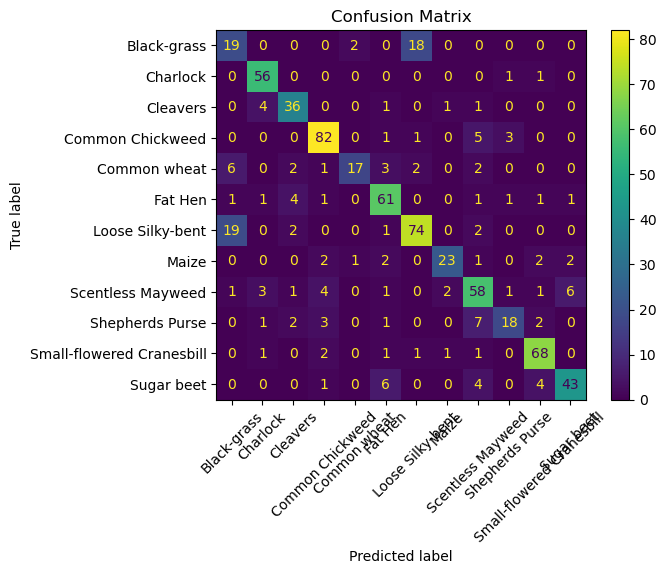

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_enc, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

## F1c: Visualization of Training vs. Validation Loss

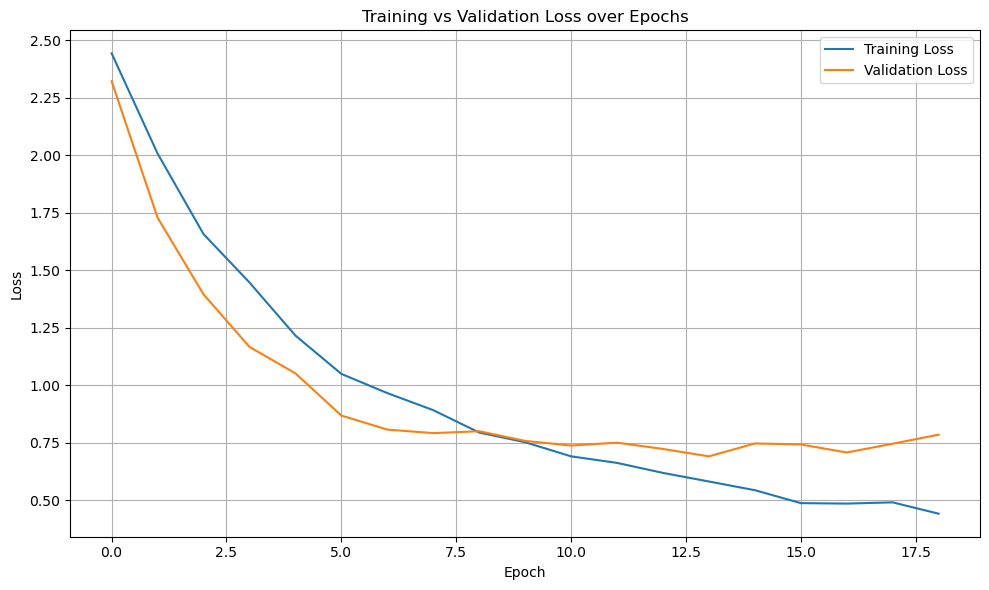

In [66]:
# Plot training vs validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("training_vs_validation_loss.png")  # Save screenshot
plt.show()

## F3: Predictive Accuracy on the Test Set

In [69]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_enc)
print(f"Test Accuracy: {test_accuracy:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7715 - loss: 0.8556
Test Accuracy: 0.7784


## G1: Saving the Trained Model

In [80]:
from tensorflow.keras.models import load_model
model.save("plant_seedling_model.keras")